In [1]:
# Install statements
# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [2]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


In [3]:
# Read in the .csv that was created during the preprocessing

df <- read.csv('Dataset_Numerical_Classes.csv')

# Visually inspect the dataframe

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,0.1883,0.0700,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,0.1629,0.1183,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0
18-24,0,Masters degree,34,34,46,47,46,0.1464,0.0700,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,0.1883,0.1183,6,3,0
65+,0,Left school at 18,29,38,35,55,52,0.1464,0.0462,6,0,0


In [4]:
# Transforming the non numerical ordinal values to numerical values with ordering

# BNLearn wants all data to be a double so we will transform all data to doubles 

df$Caffeine <- as.double( ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6")))
df$Cannabis <- as.double( ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6")))
df$Meth <- as.double( ordered(df$Meth, levels =c("0","1","2","3","4","5","6")))
df$Age <- as.double( ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+")))
df$Education <- as.double( ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree")))

In [5]:
# BNLearn wants all data to be a double so we will transform all data to doubles 

df$Gender <- as.double(df$Gender) 
df$Nscore <- as.double(df$Nscore) 
df$Escore <- as.double(df$Escore) 
df$Oscore <- as.double(df$Oscore) 
df$Ascore <- as.double(df$Ascore) 
df$Cscore <- as.double(df$Cscore) 

# Confirm that all variables are succesfully transformed into doubles
str(df)

'data.frame':	1885 obs. of  13 variables:
 $ Age              : num  3 2 3 1 3 6 4 3 3 5 ...
 $ Gender           : num  0 1 1 0 0 0 1 1 0 1 ...
 $ Education        : num  6 9 6 8 9 4 8 2 6 8 ...
 $ Nscore           : num  39 29 31 34 43 29 31 24 42 33 ...
 $ Escore           : num  36 52 45 34 28 38 32 52 55 40 ...
 $ Oscore           : num  42 55 40 46 43 35 43 40 39 36 ...
 $ Ascore           : num  37 48 32 47 41 55 41 41 48 47 ...
 $ Cscore           : num  42 41 34 46 50 52 48 52 49 43 ...
 $ Impulsive        : num  0.188 0.163 0.146 0.146 0.188 ...
 $ Sensation_seeking: num  0.07 0.118 0.132 0.07 0.118 ...
 $ Caffeine         : num  7 7 7 6 7 7 7 7 7 7 ...
 $ Cannabis         : num  1 5 4 3 4 1 2 1 1 2 ...
 $ Meth             : num  1 4 1 1 1 1 1 1 1 1 ...


In [6]:
# Inspecting the unique values of all the variables (note that R does no allow counting from 0 so all the levels of the labels are shifted +1)

print("age")
unique(df$Age)
print("gender")
unique(df$Gender)
print("education")
unique(df$Education)
print("Nscore")
unique(df$Nscore)
print("Escore")
unique(df$Escore)
print("Cscore")
unique(df$Cscore)
print("Impulsive")
unique(df$Impulsive)
print("Sensation_seeking")
unique(df$Sensation_seeking)
print("Caffeine")
unique(df$Caffeine)
print("Cannabis")
unique(df$Cannabis)
print("Meth")
unique(df$Meth)

[1] "age"


[1] 3 2 1 6 4 5

[1] "gender"


[1] 0 1

[1] "education"


[1] 6 9 8 4 2 7 5 1 3

[1] "Nscore"


[1] 39 29 31 34 43 24 42 33 26 56 28 27 19 22 41 49 32 25 40 51 35 36 46 44 37
[26] 47 23 30 38 18 45 17 53 50 60 21 54 59 48 20 55 16 57 52 58 14 15 13 12

[1] "Escore"


[1] 36 52 45 34 28 38 32 55 40 41 49 29 31 39 27 43 33 16 44 37 51 42 48 46 47
[26] 35 50 30 26 58 53 54 23 22 24 19 20 21 25 56 59 18

[1] "Cscore"


[1] 42 41 34 46 50 52 48 49 43 53 38 36 59 47 31 30 33 35 51 25 37 45 39 44 27
[26] 40 29 54 55 32 56 20 28 26 22 24 23 19 17 21 57

[1] "Impulsive"


[1] 0.1883 0.1629 0.1464 0.1363 0.1146 0.0785 0.0552 0.0106 0.1034 0.0037

[1] "Sensation_seeking"


[1] 0.0700 0.1183 0.1321 0.0462 0.1162 0.1119 0.0897 0.1114 0.0377 0.0546

[1] "Caffeine"


[1] 7 6 5 4 1 2 3

[1] "Cannabis"


[1] 1 5 4 3 2 7 6

[1] "Meth"


[1] 1 4 2 7 5 3 6

In [7]:
# Split our data into a training and testing set to be able to test how well it generalizes on unseen data

# 75% of the sample size
smp_size <- floor(0.75 * nrow(df))

# set the seed to make our partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(df)), size = smp_size)

train <- df[train_ind, ]
test <- df[-train_ind, ]

# Inspect the train and test set

str(train)
str(test)

'data.frame':	1413 obs. of  13 variables:
 $ Age              : num  1 1 4 5 2 1 1 4 1 4 ...
 $ Gender           : num  1 0 0 1 0 1 1 1 1 0 ...
 $ Education        : num  4 7 7 4 7 5 5 7 6 7 ...
 $ Nscore           : num  30 39 44 20 27 40 30 38 42 49 ...
 $ Escore           : num  32 34 33 43 48 37 43 32 26 35 ...
 $ Oscore           : num  42 53 43 38 46 53 58 41 48 48 ...
 $ Ascore           : num  29 48 48 43 43 33 51 41 44 52 ...
 $ Cscore           : num  56 48 41 45 45 41 45 37 38 43 ...
 $ Impulsive        : num  0.188 0.136 0.136 0.163 0.163 ...
 $ Sensation_seeking: num  0.112 0.118 0.118 0.112 0.07 ...
 $ Caffeine         : num  7 6 7 7 5 4 7 7 7 7 ...
 $ Cannabis         : num  7 4 2 1 3 5 6 2 6 1 ...
 $ Meth             : num  1 4 1 1 1 1 3 1 1 1 ...
'data.frame':	472 obs. of  13 variables:
 $ Age              : num  3 4 5 4 6 5 6 3 4 2 ...
 $ Gender           : num  1 1 0 1 1 0 1 1 0 0 ...
 $ Education        : num  6 8 6 6 1 4 1 8 5 8 ...
 $ Nscore           : num  31 31

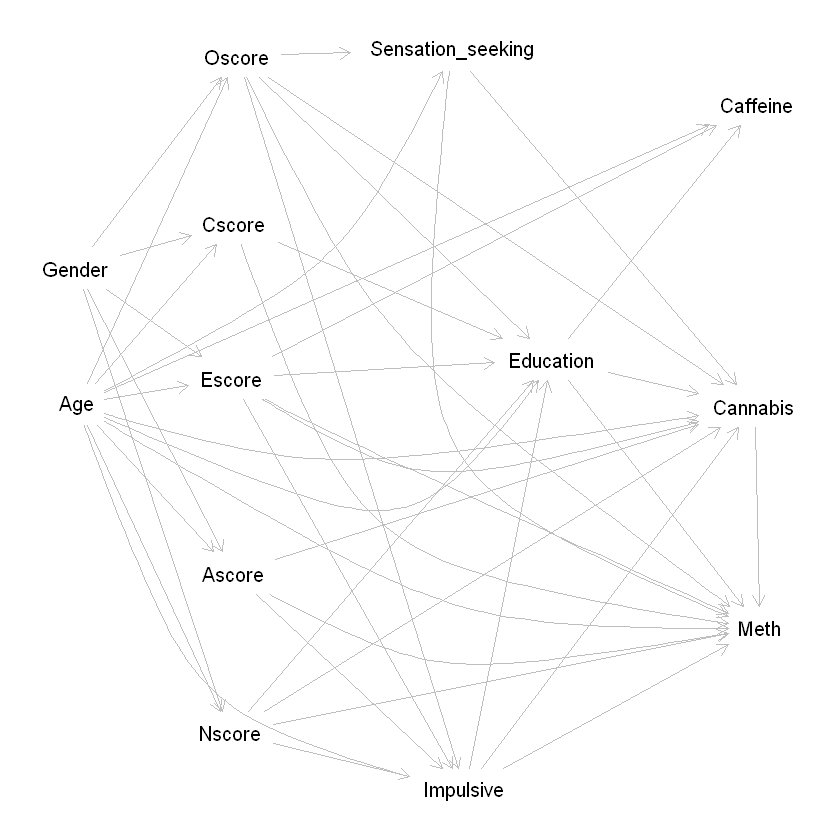

In [8]:
# Creating and plotting the DAG

graph <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Education [pos="0.421,0.597"]
Age -> Escore
Age -> Impulsive [pos="0.228,0.699"]
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Cannabis
Ascore -> Impulsive
Ascore -> Meth [pos="0.429,0.676"]
Cannabis -> Meth
Cscore -> Education
Cscore -> Meth [pos="0.357,0.605"]
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Education
Escore -> Impulsive
Escore -> Meth [pos="0.317,0.501"]
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Education
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Education
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
}
')
plot(graph)

In [9]:
# Fitting the network on our training dataset

network <- model2network(toString(graph,"bnlearn"))
fit <- bn.fit(network, as.data.frame(scale(train)))

# Inspecting our fit

fit


  Bayesian network parameters

  Parameters of node Age (Gaussian distribution)

Conditional density: Age
Coefficients:
 (Intercept)  
4.400035e-18  
Standard deviation of the residuals: 1 

  Parameters of node Ascore (Gaussian distribution)

Conditional density: Ascore | Age + Gender
Coefficients:
  (Intercept)            Age         Gender  
 2.412982e-16   4.609665e-02  -2.188232e-01  
Standard deviation of the residuals: 0.9744353 

  Parameters of node Caffeine (Gaussian distribution)

Conditional density: Caffeine | Age + Education + Escore
Coefficients:
 (Intercept)           Age     Education        Escore  
4.027234e-16  2.763042e-02  3.499472e-02  8.427258e-02  
Standard deviation of the residuals: 0.9961196 

  Parameters of node Cannabis (Gaussian distribution)

Conditional density: Cannabis | Age + Ascore + Education + Escore + Impulsive + Nscore + Oscore + Sensation_seeking
Coefficients:
      (Intercept)                Age             Ascore          Education  
    -1

In [10]:
# Predicting on the testing dataset with our fitted model (Cannabis)

pred <- predict(fit,node="Cannabis", data=test,method="bayes-lw")

accuracy <- mean(test$Cannabis - pred)
print("Average accuracy with entire network:")
accuracy

pred_parents <- predict(fit,node="Cannabis", data=test)

accuracy_par <- mean(test$Cannabis - pred_parents)
print("Average accuracy with only parents:")
accuracy_par

[1] "Average accuracy with entire network:"


[1] 0.08272933

[1] "Average accuracy with only parents:"


[1] 0.4273713

In [11]:
# Predicting on the testing dataset with our fitted model (Meth)

pred <- predict(fit,node="Escore", data=test,method="bayes-lw")

accuracy <- mean(test$Meth - pred)
print("Average accuracy with entire network:")
accuracy

pred_parents <- predict(fit,node="Meth", data=test)

accuracy_par <- mean(test$Meth - pred_parents)
print("Average accuracy with only parents:")
accuracy_par

[1] "Average accuracy with entire network:"


[1] 1.460871

[1] "Average accuracy with only parents:"


[1] 2.835424

In [12]:
# Predicting on the testing dataset with our fitted model (Caffeine)

pred <- predict(fit,node="Caffeine", data=test,method="bayes-lw")

accuracy <- mean(test$Caffeine - pred)
print("Average accuracy with entire network:")
accuracy

pred_parents <- predict(fit,node="Caffeine", data=test)

accuracy_par <- mean(test$Caffeine - pred_parents)
print("Average accuracy with only parents:")
accuracy_par

[1] "Average accuracy with entire network:"


[1] 2.841283

[1] "Average accuracy with only parents:"


[1] 2.841031